In [2]:
# Zczytnie danych z CSV
import pandas as pd
data = pd.read_csv("messy_data.csv")

In [3]:
# Sprawdzenie struktury 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  200 non-null    object 
 5    y dimension  200 non-null    object 
 6    z dimension  200 non-null    object 
 7    depth        200 non-null    object 
 8    table        200 non-null    object 
 9    price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [4]:
# Usuwanie białych znaków
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '')

In [5]:
# Usuwanie duplikatów
data = data.drop_duplicates()

In [6]:
# Konwersja kolumn liczbowych
numeric_columns = ['xdimension', 'ydimension', 'zdimension', 'depth', 'table', 'price']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
# Formatowanie kolumn tekstowych 
text_columns = ['clarity', 'color', 'cut']
data[text_columns] = data[text_columns].apply(lambda x: x.str.lower())

In [8]:
# Uśrednianie brakujących wartośći dla x-y-z dimension
numeric_columns = ['xdimension', 'ydimension', 'zdimension', 'depth', 'table']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [9]:
# Usunięcie wierszy, gdzie brakuje kluczowych wartości
data.dropna(subset=['price', 'carat', 'depth', 'table'], inplace=True)

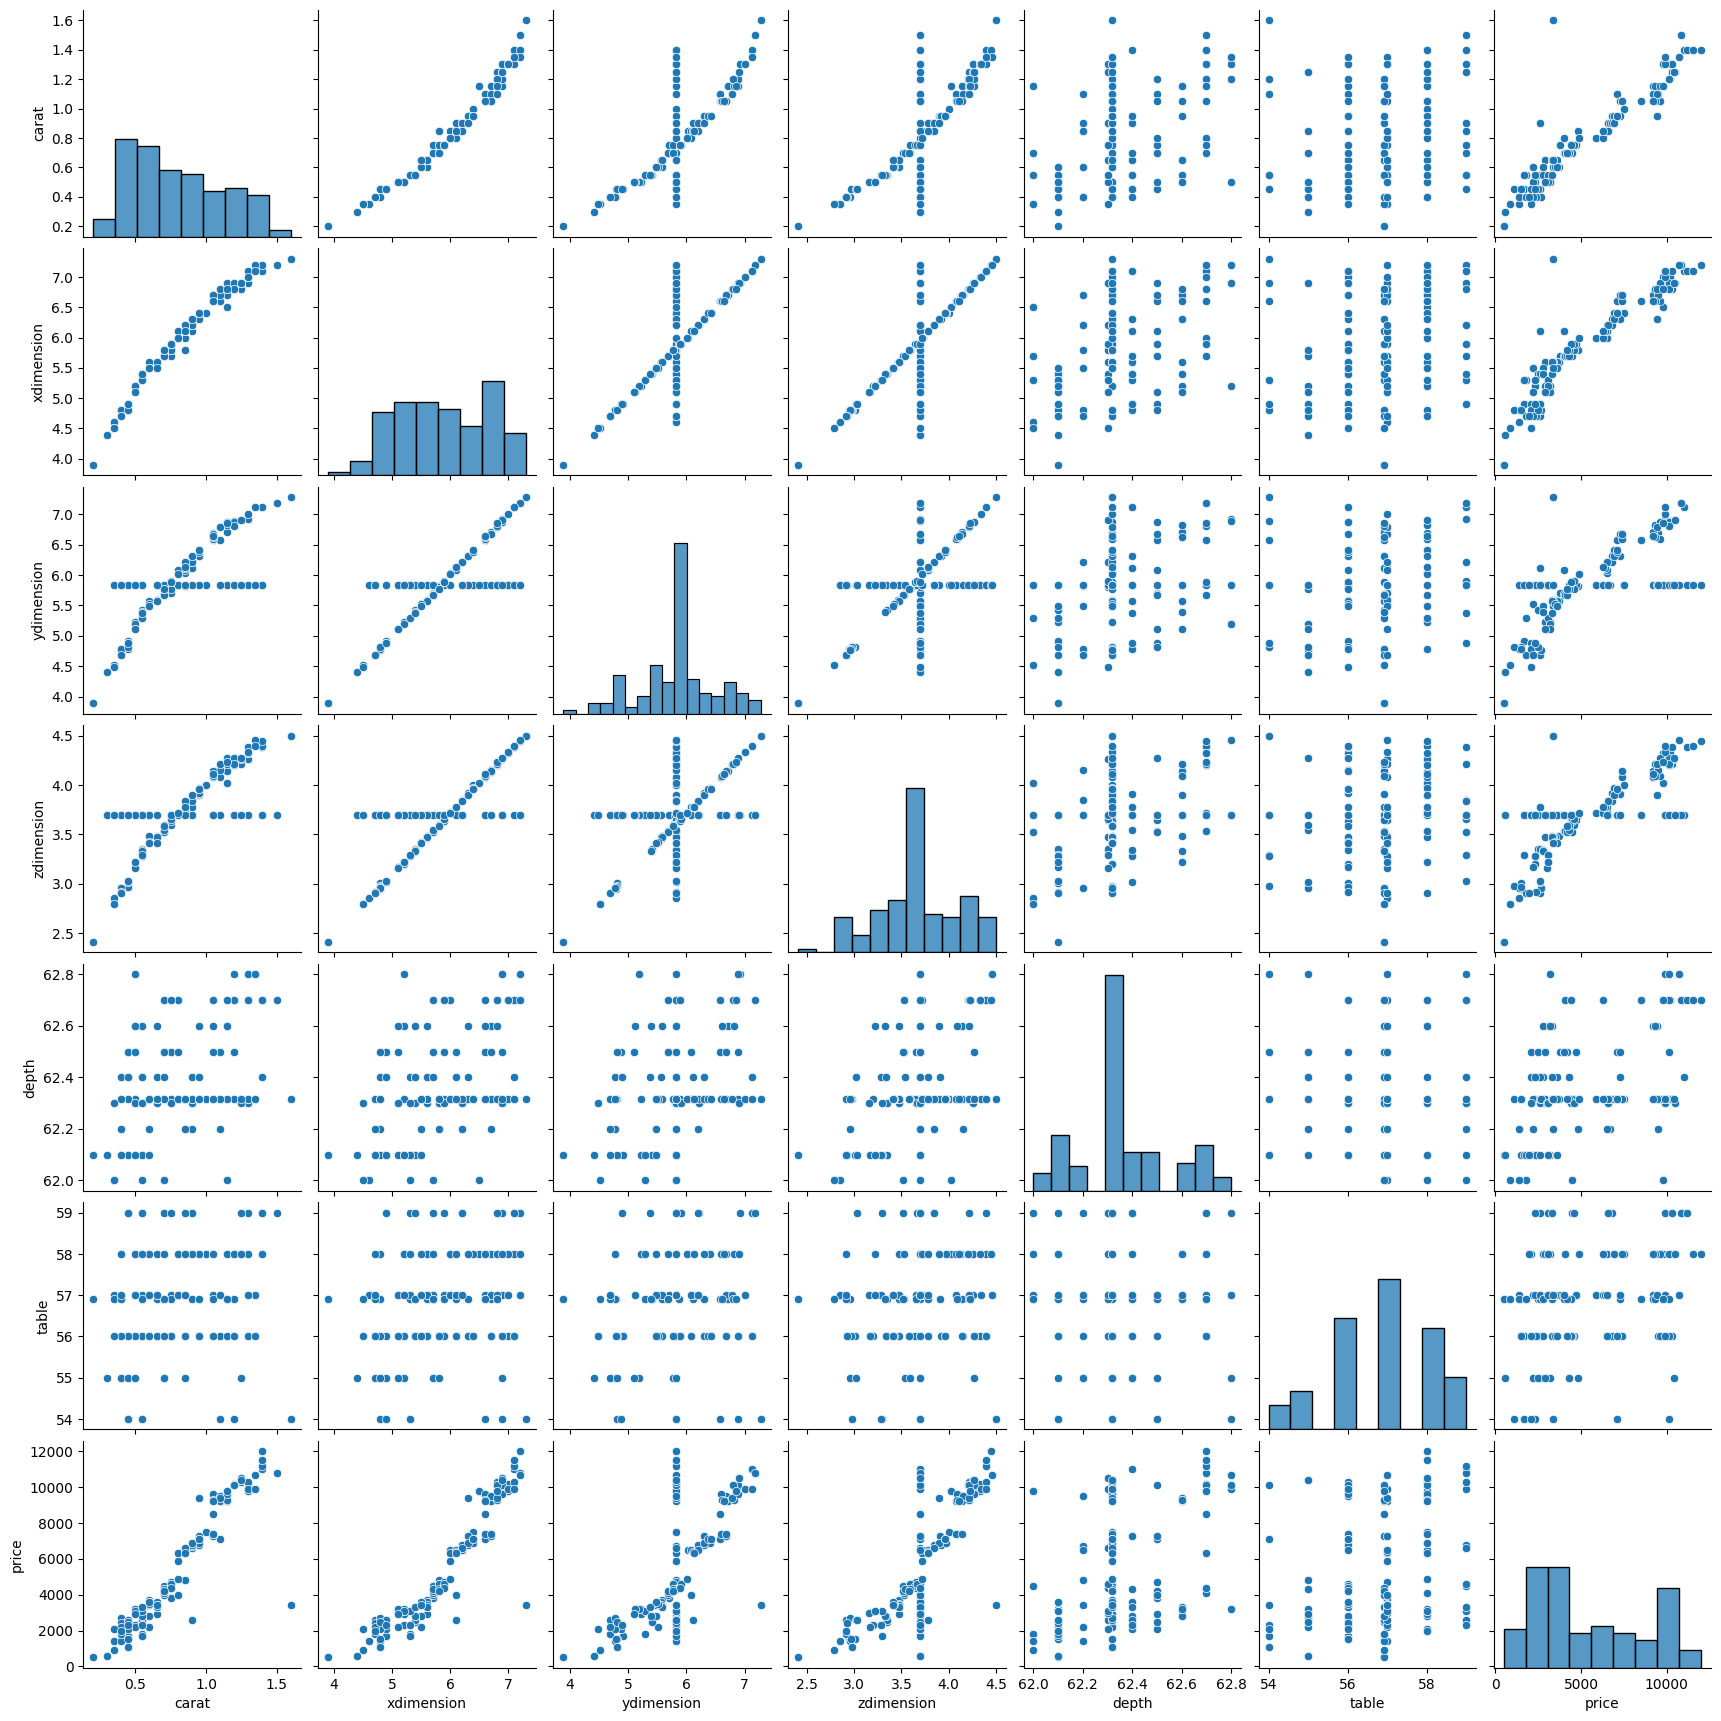

In [10]:
import seaborn as sns

# Usunięcie wartości odstających za pomocą kwartyli
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = ['carat', 'depth', 'table', 'price']
data = remove_outliers(data, numerical_cols)

sns.pairplot(data)

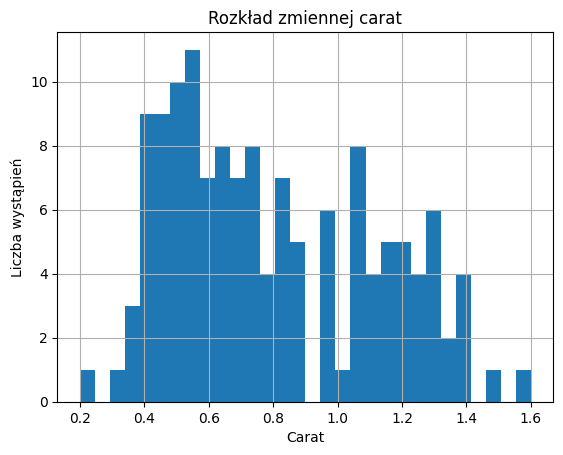

C:\Users\barto\AppData\Local\Temp\ipykernel_14828\4148198089.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['depth'], shade=True)


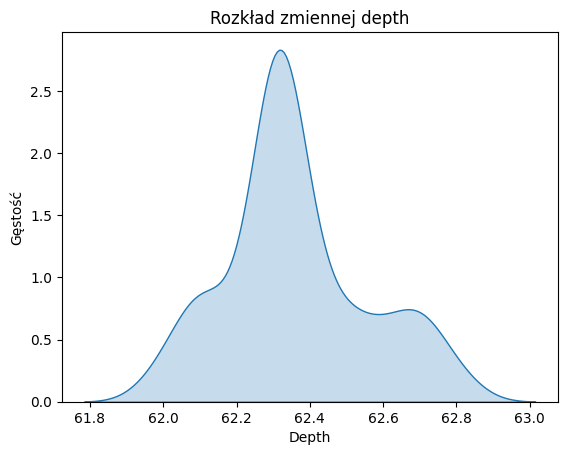

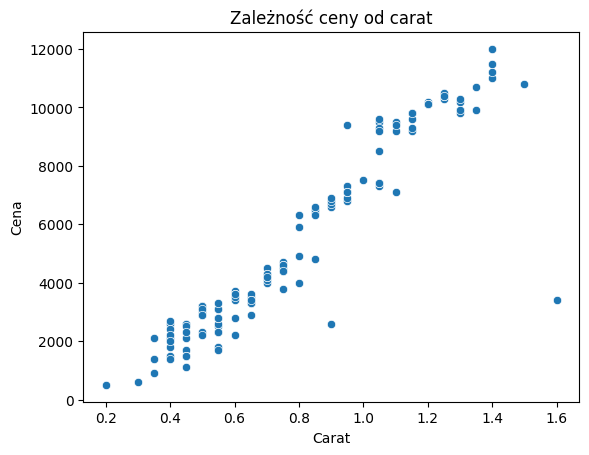

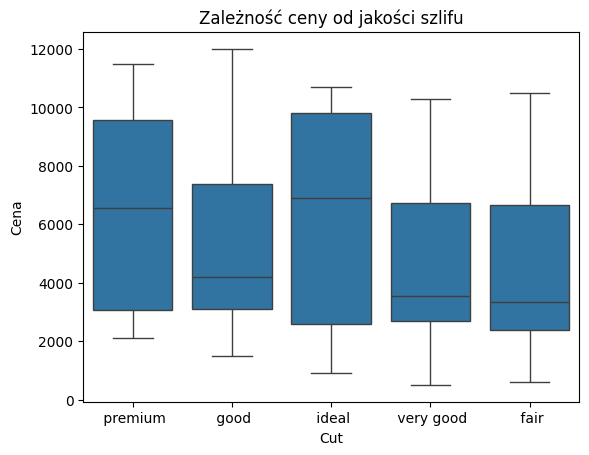

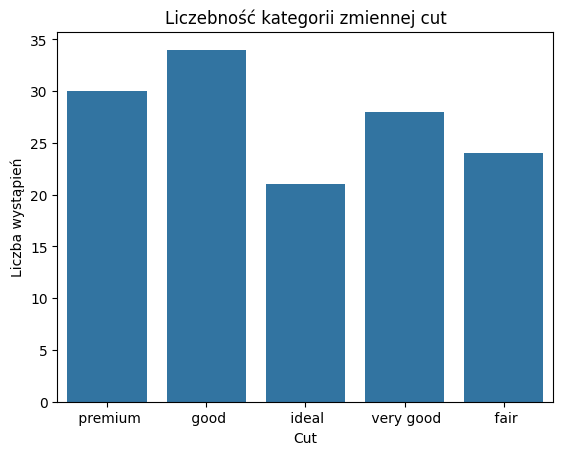

C:\Users\barto\AppData\Local\Temp\ipykernel_14828\4148198089.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color', data=data, palette='hls')


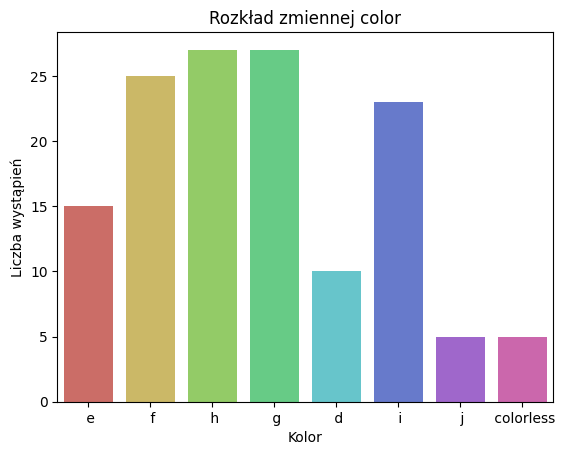

In [11]:
# Wizualizacja rozkładu zmiennych

import matplotlib.pyplot as plt

# Histogram
data['carat'].hist(bins=30)
plt.title('Rozkład zmiennej carat')
plt.xlabel('Carat')
plt.ylabel('Liczba wystąpień')
plt.show()

# Wykres gęstości
sns.kdeplot(data['depth'], shade=True)
plt.title('Rozkład zmiennej depth')
plt.xlabel('Depth')
plt.ylabel('Gęstość')
plt.show()

# Wykres punktowy dla ceny i carat
sns.scatterplot(x='carat', y='price', data=data)
plt.title('Zależność ceny od carat')
plt.xlabel('Carat')
plt.ylabel('Cena')
plt.show()

# Wykres pudełkowy dla ceny i cut
sns.boxplot(x='cut', y='price', data=data)
plt.title('Zależność ceny od jakości szlifu')
plt.xlabel('Cut')
plt.ylabel('Cena')
plt.show()

# Liczebność dla zmiennej 'cut'
sns.countplot(x='cut', data=data)
plt.title('Liczebność kategorii zmiennej cut')
plt.xlabel('Cut')
plt.ylabel('Liczba wystąpień')
plt.show()

# Rozkładu zmiennej 'color'
sns.countplot(x='color', data=data, palette='hls')
plt.title('Rozkład zmiennej color')
plt.xlabel('Kolor')
plt.ylabel('Liczba wystąpień')
plt.show()


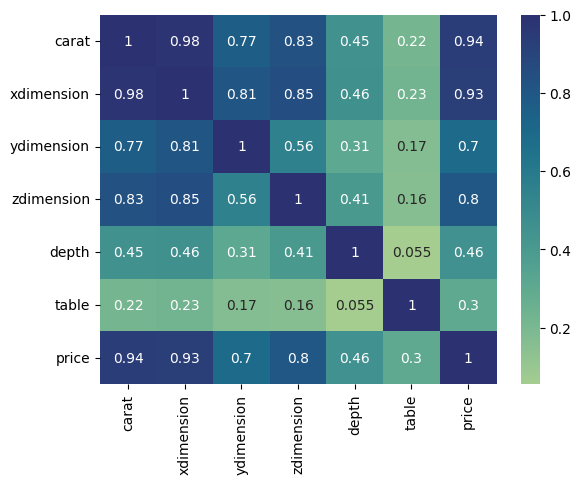

In [12]:
# HeatMapa korelacji

corr = data.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr, cmap="crest", annot=True);

In [13]:
import plotly.express as px

# Wizualizacja zależności ceny od masy diamentu
fig = px.scatter(data, x='carat', y='price', title='Zależność ceny od masy diamentu', trendline="ols")
fig.show()

In [14]:
import statsmodels.formula.api as smf

# Formuły regresji, gdzie 'price' jest zmienną zależną, a pozostałe zmienne są niezależnymi
formula = "price ~ carat + clarity"

# Budowanie modelu
model = smf.ols(formula=formula, data=data).fit()

# Wyświetlenie podsumowania modelu
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     193.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.06e-62
Time:                        02:13:29   Log-Likelihood:                -1142.3
No. Observations:                 137   AIC:                             2299.
Df Residuals:                     130   BIC:                             2319.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3151.1976    360.673  